<a href="https://colab.research.google.com/github/Piyush86kumar/Cat-vs-Dogs-Classification-/blob/main/Cats_vs_Dogs_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# import required libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization, Dropout

In [5]:
#create a folder .kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
#loading the dataset
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:11<00:00, 82.8MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s] 


In [7]:
# extracting data from zip file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
# keras generators -
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

  train_datset = train_dataset.map(process)
  validation_dataset = validation_dataset.map(process)

In [21]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides= 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides= 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides= 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation = 'sigmoid'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
history = model.fit(train_dataset, epochs = 10, validation_data = validation_dataset)

In [54]:
 model.evaluate(validation_dataset)

157/157 [==============================] - 8s 46ms/step - loss: 0.6087 - accuracy: 0.8134


[0.6087148189544678, 0.8133999705314636]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color ='blue', label = 'validation')
plt.legend()
plt.show()

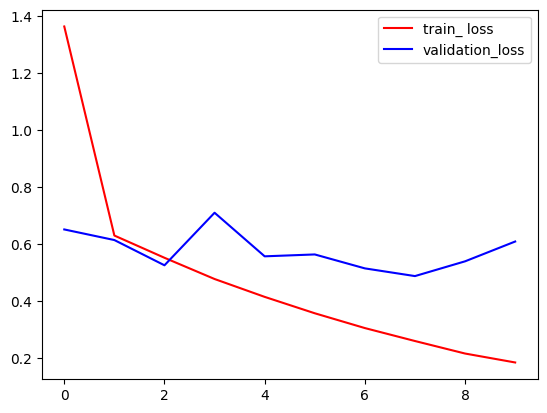

In [27]:
plt.plot(history.history['loss'], color = 'red', label = 'train_ loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation_loss')
plt.legend()
plt.show()

In [28]:
import cv2

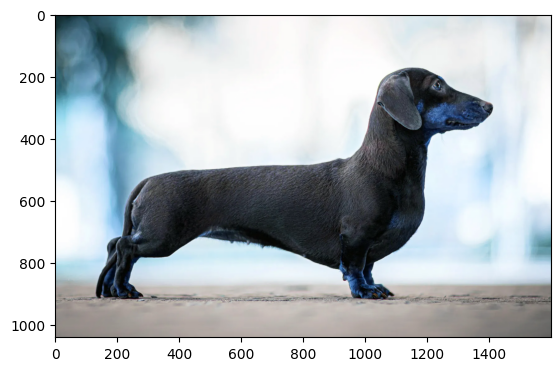

In [50]:
test_img = cv2.imread('/content/dog 03.webp')
plt.imshow(test_img)

In [51]:
test_img.shape

(1041, 1600, 3)

In [52]:
test_img = cv2.resize(test_img,(256,256))

In [53]:
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


array([[0.09629788]], dtype=float32)